# Predição de Parada Cardíaca com MLP

## Importando bibliotecas

In [86]:
import numpy as np
import pandas as pd
import seaborn as sns

from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)

## Visão geral dos dados

In [87]:
dataset = pd.read_csv('data/heart.csv')
"""
[Attribute Information]

Age           : idade do paciente [anos]
Sex           : sexo do paciente [M: Masculino, F: Feminino]
ChestPainType : tipo da dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor não-anginal, ASY: Assintomática]
RestingBP     : pressão arterial em repouso [mm Hg]
Cholesterol   : colesterol [mm/dl]
FastingBS     : açúcar no sangue em jejum [1: se > 120 mg/dl, 0: se < 120 mg/dl]
RestingECG    : resultados de eletrocardiograma em repouso [Normal: Normal, 
                                                  ST: possui ST-T anormal (T wave inversions and/or ST elevation or depression of > 0.05 mV), 
                                                  LVH: propabilidade de hipertrofia ventricular esquerda pelo critério Estes']
MaxHR         : frequência cardíaca máxima alcançada [valor numérico entre 60 e 202]
ExerciseAngina: angina induzida por exercício [Y: Sim, N: Não]
Oldpeak       : picos = ST [valor numérico entre 0 e 6.2]
ST_Slope      : inclinação do segmento ST de pico do exercício [Up : inclinado pra cima, 
                                                          Flat: plano, 
                                                          Down: inclinado para baixo]
HeartDisease  : output class [1: problema no coração,
                              0: Normal]

"""

"\n[Attribute Information]\n\nAge           : idade do paciente [anos]\nSex           : sexo do paciente [M: Masculino, F: Feminino]\nChestPainType : tipo da dor no peito [TA: Angina Típica, ATA: Angina Atípica, NAP: Dor não-anginal, ASY: Assintomática]\nRestingBP     : pressão arterial em repouso [mm Hg]\nCholesterol   : colesterol [mm/dl]\nFastingBS     : açúcar no sangue em jejum [1: se > 120 mg/dl, 0: se < 120 mg/dl]\nRestingECG    : resultados de eletrocardiograma em repouso [Normal: Normal, \n                                                  ST: possui ST-T anormal (T wave inversions and/or ST elevation or depression of > 0.05 mV), \n                                                  LVH: propabilidade de hipertrofia ventricular esquerda pelo critério Estes']\nMaxHR         : frequência cardíaca máxima alcançada [valor numérico entre 60 e 202]\nExerciseAngina: angina induzida por exercício [Y: Sim, N: Não]\nOldpeak       : picos = ST [valor numérico entre 0 e 6.2]\nST_Slope      :

In [88]:
dataset.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


## Análise exploratória dos dados

### Colunas numéricas

C:\Users\rafin\AppData\Local\Temp\ipykernel_11376\2391195420.py:5: UserWarning:

To output multiple subplots, the figure containing the passed axes is being cleared.



array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'RestingBP'}>,
        <AxesSubplot:title={'center':'Cholesterol'}>],
       [<AxesSubplot:title={'center':'FastingBS'}>,
        <AxesSubplot:title={'center':'MaxHR'}>,
        <AxesSubplot:title={'center':'Oldpeak'}>],
       [<AxesSubplot:title={'center':'HeartDisease'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

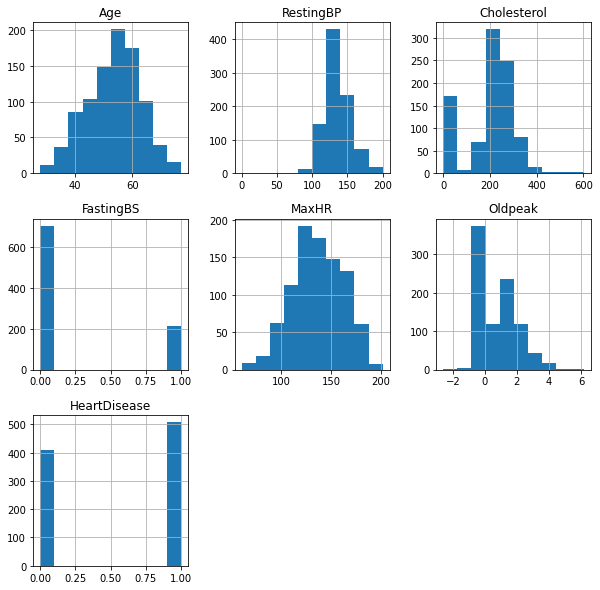

In [89]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10))
ax = fig.gca()
dataset.hist(ax=ax)

### Colunas categóricas

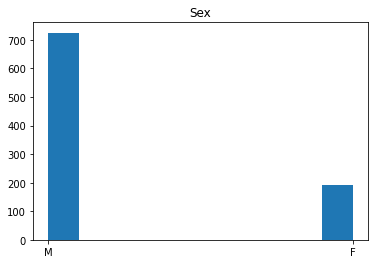

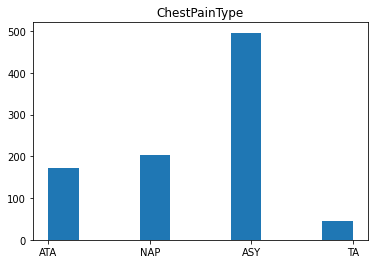

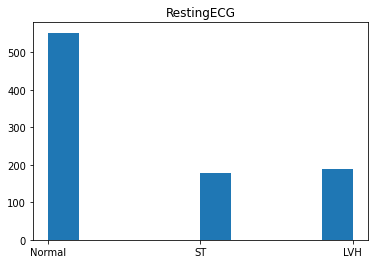

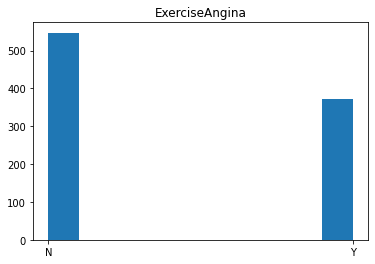

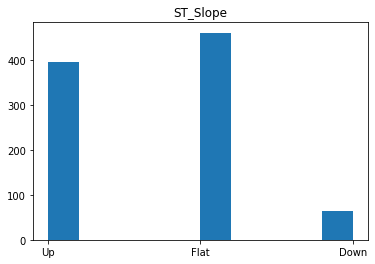

In [78]:
categorical_feat = dataset[['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']] 

for i in categorical_feat.columns:
    plt.hist(categorical_feat[i])
    plt.title(i)
    plt.show()

In [8]:
# Verificando a correlação entre os generos

import plotly.express as px

fig = px.histogram(dataset,
                   x          = "HeartDisease",
                   color      = "Sex",
                   hover_data = dataset.columns,
                   title      = "Gender relationship with Heart Disease",
                   barmode    = "group",
                   width      = 600,
                   height     = 400)
fig.show()

print("\n")
print("Quantidade de pessoas do gênero feminino: ", dataset[dataset["Sex"]=="F"]["HeartDisease"].count())
print("Quantidade de pessoas do gênero masculino: ", dataset[dataset["Sex"]=="M"]["HeartDisease"].count())
print("\n")

pd.pivot_table(dataset,
               index   = 'HeartDisease', 
               columns = 'Sex', 
               values  = 'ChestPainType',
               aggfunc ='count')

NameError: name 'pd' is not defined

## Pré-processamento

In [79]:
# Removendo linhas onde Cholesterol e RestingBP são iguais a 0

dataset.drop(dataset[dataset['Cholesterol'] == 0].index, inplace=True)
dataset.drop(dataset[dataset['RestingBP'] == 0].index, inplace=True)

In [80]:
from sklearn.preprocessing import LabelEncoder

dataset = dataset.apply(LabelEncoder().fit_transform) # converte todas as colunas para inteiros

In [81]:
dataset.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,12,1,1,38,146,0,1,88,0,1,2,0
1,21,0,2,52,39,0,1,72,0,11,1,1
2,9,1,1,28,140,0,2,17,0,1,2,0
3,20,0,0,36,71,0,1,24,1,16,1,1
4,26,1,2,46,52,0,1,38,0,1,2,0


## Divisão dos dados

In [82]:
from sklearn.model_selection import train_test_split

X = dataset.iloc[:, :-1].values # todas as linhas, menos a última coluna
y = dataset.iloc[:,-1].values # todas as linhas, apenas a última coluna

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state = None
                                                    )

In [65]:
# Normalizando os dados

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train) # fit_transform: calcula a média e o desvio padrão e aplica a transformação
X_test_scaled = scaler.transform(X_test) # transform: usa a média e o desvio padrão calculados anteriormente

## Modelagem da rede neural

In [66]:
from sklearn.neural_network import MLPClassifier
mlp_clf = MLPClassifier(
                    hidden_layer_sizes  = (1000),
                    alpha               = 0.05,      # Termo de regularização L2
                    max_iter            = 500,       # Número máximo de iterações. O treinamento para quando atinge esse número de iterações	
                    tol                 = 1e-3,      # Tolerância para o critério de parada
                    batch_size          = 24,        # Tamanho do lote para otimização estocástica
                    validation_fraction = 0.3,
                    verbose             = True).fit(X_train_scaled, y_train)

Iteration 1, loss = 0.49331971
Iteration 2, loss = 0.38299160
Iteration 3, loss = 0.36222777
Iteration 4, loss = 0.34550298
Iteration 5, loss = 0.33432154
Iteration 6, loss = 0.32124237
Iteration 7, loss = 0.31128281
Iteration 8, loss = 0.30202777
Iteration 9, loss = 0.29688759
Iteration 10, loss = 0.28733669
Iteration 11, loss = 0.28414724
Iteration 12, loss = 0.27868225
Iteration 13, loss = 0.27521033
Iteration 14, loss = 0.27141342
Iteration 15, loss = 0.26876981
Iteration 16, loss = 0.26252763
Iteration 17, loss = 0.26163090
Iteration 18, loss = 0.25829212
Iteration 19, loss = 0.25543094
Iteration 20, loss = 0.25320399
Iteration 21, loss = 0.24949062
Iteration 22, loss = 0.24857187
Iteration 23, loss = 0.24855409
Iteration 24, loss = 0.24789698
Iteration 25, loss = 0.24283267
Iteration 26, loss = 0.23875909
Iteration 27, loss = 0.23559481
Iteration 28, loss = 0.23523933
Iteration 29, loss = 0.23215512
Iteration 30, loss = 0.23228921
Iteration 31, loss = 0.23047961
Iteration 32, los

## Curva de perda

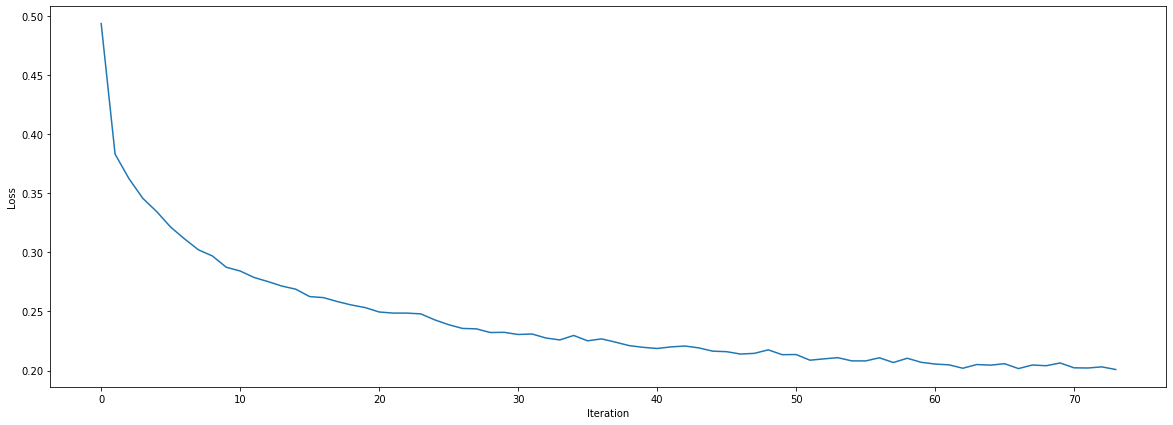

In [69]:
plt.figure(figsize=(20,7))
plt.plot(mlp_clf.loss_curve_)
plt.ylabel("Loss")
plt.xlabel("Iteration")
plt.show()

## Testando o modelo

In [70]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

# Testando o modelo
y_pred_test_mlp   = mlp_clf.predict(X_test_scaled)

# Avaliando o modelo
print("Acurácia : ",accuracy_score(y_test, y_pred_test_mlp)*100,"%")
print("Precisão : ",precision_score(y_test, y_pred_test_mlp)*100,"%")

Acurácia :  78.0 %
Precisão :  81.94444444444444 %
